In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [119]:
df = pd.read_csv("/content/storedata.csv")
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


In [120]:
df = df[["Car park", "Location", "Store age", "Competition score","Performance"]]
df

,Car park,Location,Store age,Competition score,Performance
0,Yes,Retail Park,3,16,Good
1,Yes,Shopping Centre,4,19,Good
2,No,Retail Park,11,18,Bad
3,No,High Street,5,12,Bad
4,No,Retail Park,7,13,Bad
...,...,...,...,...,...
131,Yes,Retail Park,6,14,Bad
132,No,Shopping Centre,5,18,Bad
133,No,Shopping Centre,7,18,Bad
134,No,High Street,11,10,Bad


In [121]:
df_copied = df.copy()
df_copied

,Car park,Location,Store age,Competition score,Performance
0,Yes,Retail Park,3,16,Good
1,Yes,Shopping Centre,4,19,Good
2,No,Retail Park,11,18,Bad
3,No,High Street,5,12,Bad
4,No,Retail Park,7,13,Bad
...,...,...,...,...,...
131,Yes,Retail Park,6,14,Bad
132,No,Shopping Centre,5,18,Bad
133,No,Shopping Centre,7,18,Bad
134,No,High Street,11,10,Bad


In [122]:
df_copied.isnull().sum()

Car park             0
Location             0
Store age            0
Competition score    0
Performance          0
dtype: int64

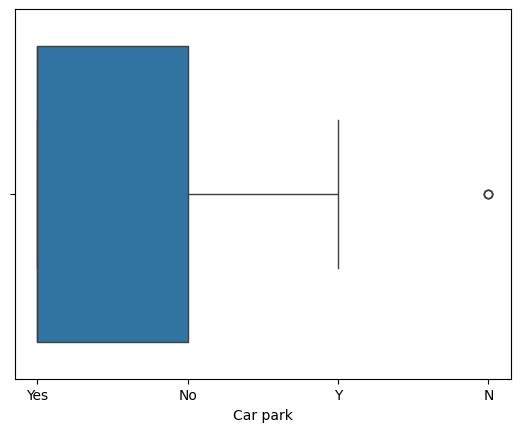

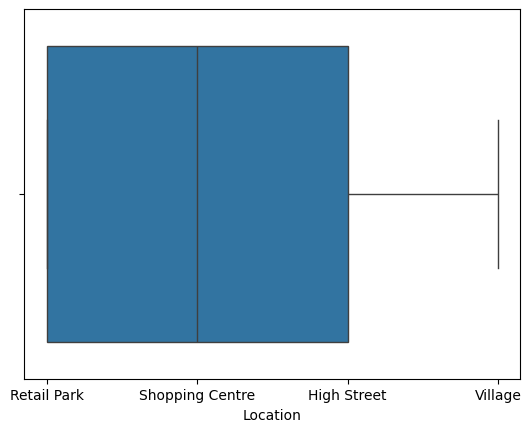

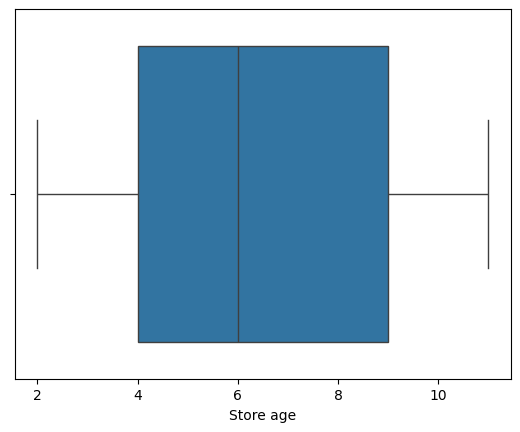

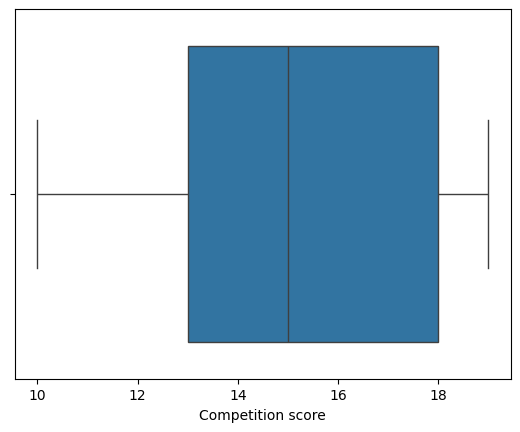

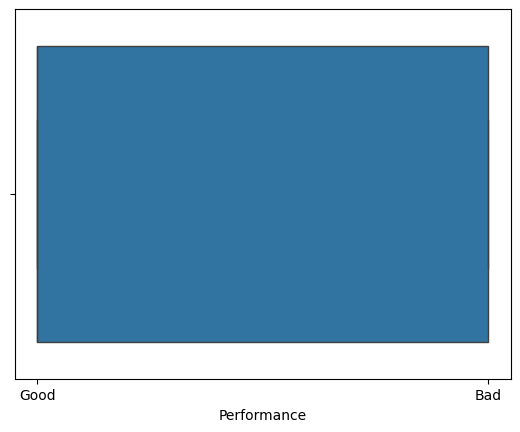

In [123]:
# prompt: write code to create box plot for all the columns in df

import seaborn as sns

# Create boxplots for all columns in df
for column in df_copied.columns:
  sns.boxplot(x=df[column])
  plt.show()


In [124]:
df_copied['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [125]:
df_copied = df_copied[~df_copied['Car park'].isin(['Y', 'N'])]

In [126]:
df_copied["Car park"].unique()

array(['Yes', 'No'], dtype=object)

In [127]:
df_copied['Car park']

0      Yes
1      Yes
2       No
3       No
4       No
      ... 
131    Yes
132     No
133     No
134     No
135    Yes
Name: Car park, Length: 129, dtype: object

In [128]:
df_copied

,Car park,Location,Store age,Competition score,Performance
0,Yes,Retail Park,3,16,Good
1,Yes,Shopping Centre,4,19,Good
2,No,Retail Park,11,18,Bad
3,No,High Street,5,12,Bad
4,No,Retail Park,7,13,Bad
...,...,...,...,...,...
131,Yes,Retail Park,6,14,Bad
132,No,Shopping Centre,5,18,Bad
133,No,Shopping Centre,7,18,Bad
134,No,High Street,11,10,Bad


In [129]:
df_copied = df_copied.dropna()
df_copied.isnull().sum()

Car park             0
Location             0
Store age            0
Competition score    0
Performance          0
dtype: int64

In [130]:
le_car = LabelEncoder()
df_copied['Car park'] = le_car.fit_transform(df_copied['Car park'])
df_copied['Car park']


0      1
1      1
2      0
3      0
4      0
      ..
131    1
132    0
133    0
134    0
135    1
Name: Car park, Length: 129, dtype: int64

In [131]:
le_location = LabelEncoder()
df_copied['Location'] = le_location.fit_transform(df_copied['Location'])
df_copied['Location'].unique()

array([1, 2, 0, 3])

In [132]:
le_performance = LabelEncoder()
df_copied['Performance'] = le_performance.fit_transform(df_copied['Performance'])
df_copied['Performance'].unique()

array([1, 0])

In [133]:
X = df_copied.drop('Performance', axis = 1 )
y = df_copied["Performance"]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [136]:
y_pred = logistic_reg.predict(X_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)

In [138]:
print(accuracy)

0.6153846153846154


In [139]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [142]:
grid_search = GridSearchCV(estimator=dec_tree,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [143]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [144]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)

In [145]:
dec_tree = DecisionTreeClassifier(max_depth=2,random_state = 42, min_samples_leaf=10 )

dec_tree.fit(X_train,y_train)
dec_tree.score(X_train,y_train)

0.7087378640776699

In [146]:
y_pred = dec_tree.predict(X_test)

In [147]:
accuracy = accuracy_score(y_test, y_pred)

In [148]:
accuracy

0.6923076923076923

In [149]:
X

,Car park,Location,Store age,Competition score
0,1,1,3,16
1,1,2,4,19
2,0,1,11,18
3,0,0,5,12
4,0,1,7,13
...,...,...,...,...
131,1,1,6,14
132,0,2,5,18
133,0,2,7,18
134,0,0,11,10


In [152]:
X = np.array([['Yes','Retail Park',3,12]])
X

array([['Yes', 'Retail Park', '3', '12']], dtype='<U21')

In [153]:
X[: ,0] = le_car.transform(X[: ,0])
X[: ,1] = le_location.transform(X[:,1])
X = X.astype(float)
X



array([[ 1.,  1.,  3., 12.]])

In [154]:
y_pred = dec_tree.predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [155]:


import pickle

# Save the trained decision tree classifier

data = {"model" : dec_tree, "le_car" : le_car, "le_location" : le_location}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)




In [156]:

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)


loaded_dec_tree = data["model"]
le_car = data["le_car"]
le_loaction = data["le_location"]



In [157]:
# Make predictions using the loaded model
y_pred = loaded_dec_tree.predict(X)
print(y_pred)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
